<a href="https://colab.research.google.com/github/parth1614/QuantumComputing-Qiskit/blob/main/Half_Adder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

     |████████████████████████████████| 6.5 MB 8.1 MB/s 
     |████████████████████████████████| 18.0 MB 89 kB/s 
     |████████████████████████████████| 238 kB 69.1 MB/s 
     |████████████████████████████████| 200 kB 50.5 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 1.6 MB 31.7 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 37.5 MB 1.1 MB/s 
     |████████████████████████████████| 943 kB 41.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 3.6 MB 42.9 MB/s 
     |████████████████████████████████| 113 kB 54.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.2-py3-none-any.whl size=11805 sha256=64ff390fec8fba196230a7e0d3b04a8434eeddf6e12f50a45340dc7cc5079ce5
  Stored in directory: /root/.cache/pip/wheels/62/77/65/cda6eedfdd2a525bd3f479a4386930ae3088a1eb01f8c94

In [2]:
from qiskit import QuantumCircuit, assemble, Aer

In [3]:
qc = QuantumCircuit(2)
qc.cx(0,1)

In [4]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline 

In [7]:
!pip install pylatexenc


In [9]:
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

# **ENCODING THE INPUT**

In [10]:
qc = QuantumCircuit(4,2)
qc.x(0) ##Flips the 1st qubit to 1
qc.x(1) ##Flips the 2nd qubit to 1, as we want to perform '1+1'

# **Using CNOT to perform XOR operations on 2nd qubit**

In [11]:
qc.cx(0,2)
qc.cx(1,2)

# **Extracting the outputs**

In [12]:
## Extracting XOR values of 2nd qubit
qc.measure(2,0)
qc.measure(3,1)
qc.draw()

┌───┐             
q_0: ┤ X ├──■──────────
     ├───┤  │          
q_1: ┤ X ├──┼────■─────
     └───┘┌─┴─┐┌─┴─┐┌─┐
q_2: ─────┤ X ├┤ X ├┤M├
      ┌─┐ └───┘└───┘└╥┘
q_3: ─┤M├────────────╫─
      └╥┘            ║ 
c: 2/══╩═════════════╩═
       1             0

# **Adding ccx Tofolli gate**

In [13]:
## use ccx to write the AND of inputs at qubit 3
qc.ccx(0,1,3)
qc.measure(3,1) ## Extract the value of AND operation from qubit 3
qc.draw()

┌───┐                     
q_0: ┤ X ├──■────────────■─────
     ├───┤  │            │     
q_1: ┤ X ├──┼────■───────■─────
     └───┘┌─┴─┐┌─┴─┐┌─┐  │     
q_2: ─────┤ X ├┤ X ├┤M├──┼─────
      ┌─┐ └───┘└───┘└╥┘┌─┴─┐┌─┐
q_3: ─┤M├────────────╫─┤ X ├┤M├
      └╥┘            ║ └───┘└╥┘
c: 2/══╩═════════════╩═══════╩═
       1             0       1

# **Running the circuit on Quantum Simulator**

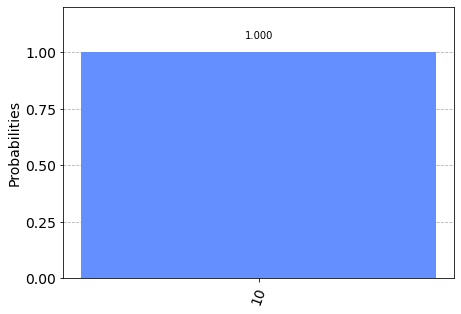

In [16]:
from qiskit import execute
counts = execute(qc, Aer.get_backend('aer_simulator')).result().get_counts()
plot_histogram(counts)

Therefore, the outpu comes out to be **1 0** , which is the additive result of '1+1'